In [1]:
import numpy as np
from nonlinear import NLSModel
import matplotlib.pyplot as plt
from data import shape_data

In [16]:
# get the data
data = shape_data()

test_cutoff = 2*len(data)//3

# the last column is what we're trying to predict
cols = [
    # 'artist_count',
    # 'released_year',
    # 'released_month',
    # 'released_day',
    # 'bpm',
    'in_spotify_playlists',
    # 'mode',
    # 'danceability_%',
    # 'valence_%',
    'energy_%',
    # 'acousticness_%',
    # 'instrumentalness_%',
    # 'liveness_%',
    # 'speechiness_%'
    'streams'
]

In [23]:
# now do all of that a lot for a bunch of different train sizes
train_scores = []
test_scores = []

for i in range(30, int(test_cutoff*0.9), 40):
    print(i)
    # get train and test
    train = data[:i]
    train = train[cols].to_numpy()
    test = data[i:test_cutoff]
    test = test[cols].to_numpy()
    
    train_input = train[:, :-1]
    train_answers = train[:, -1]

    test_input = test[:, :-1]
    test_answers = test[:, -1]

    # create the model
    model = NLSModel(10**(-4), 10**(-2), 10**(1), 3)

    # train and cross-validate it
    model.fit(train_input, train_answers)
    train_scores.append(model.get_scores()[-1])
    test_scores.append(model.test(test_input, test_answers))


30
70
110
150
190
230
270
310
350
390
430
470
510
550


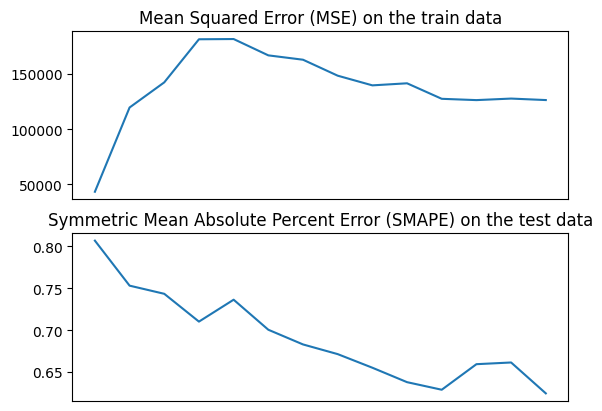

In [39]:
# plot the scores
fig = plt.figure()
train_plot = fig.add_subplot(211)
train_plot.plot(train_scores)
train_plot.set_title("Mean Squared Error (MSE) on the train data")
plt.xticks([])
test_plot = fig.add_subplot(212)
test_plot.plot(test_scores)
test_plot.set_title("Symmetric Mean Absolute Percent Error (SMAPE) on the test data")
plt.xticks([])

plt.show()

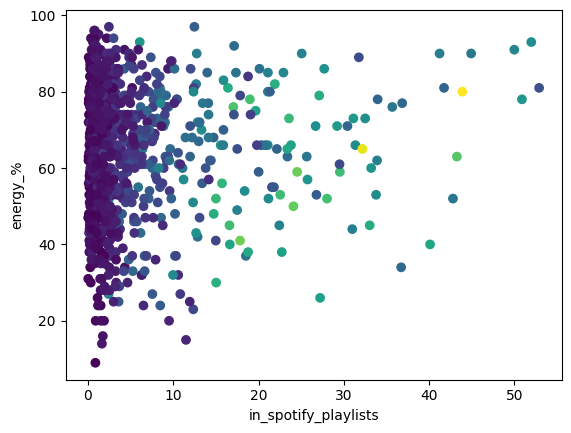

In [33]:
display = data[cols].to_numpy()
plt.scatter(display[:, 0], display[:, 1], c=display[:, 2])
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

In [18]:
train_cutoff = len(data)//2

train = data[:train_cutoff]
test = data[train_cutoff:test_cutoff]
holdout = data[test_cutoff:]

train = train[cols].to_numpy()
test = test[cols].to_numpy()
holdout = holdout[cols].to_numpy()

# get (a pretty good) model up and running
model = NLSModel(10**(-4), 10**(-2), 10**(1), 3)

# fit
train_input = train[:, :-1]
train_answers = train[:, -1]
model.fit(train[:, :-1], train[:, -1])

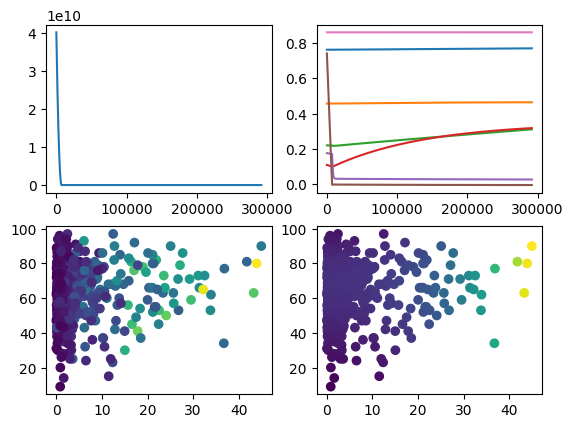

In [19]:
fig = plt.figure()
scores = model.get_scores()
weights = model.get_weights()
fig.add_subplot(221).plot(scores)
fig.add_subplot(222).plot(weights)
values = model.predict(weights[-1], train_input)
fig.add_subplot(223).scatter(train_input[:, 0], train_input[:, 1], c=train_answers)
fig.add_subplot(224).scatter(train_input[:, 0], train_input[:, 1], c=values)
plt.show()

In [20]:

# plot the function itself
def func(c, x, y):
    # get every possible combination of x and y
    combos = []
    for i in x:
        for j in y:
            combos.append([i, j])

        
    combos = np.array(combos)

    # make a prediction
    pred = model.predict(c, combos)

    # now take those answers and populate a 2-d array with the given values
    len = x.shape[0]
    retmat = np.zeros((len, len))
    for i in range(len):
        for j in range(len):
            # run through the list, populating the matrix
            retmat[i, j] = pred[j*len + i]

        
    return retmat

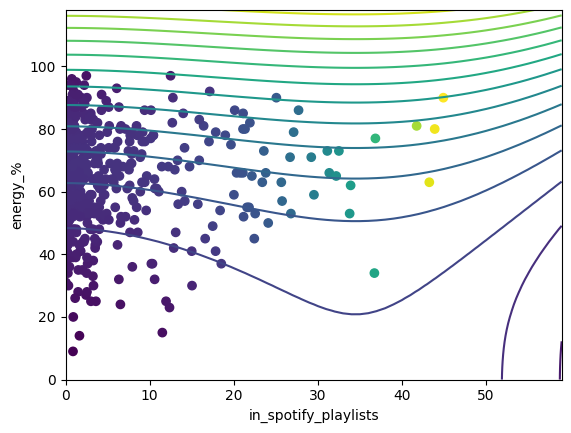

In [21]:

x = np.arange(60)
y = np.arange(60)*2

plt.contour(x, y, func(weights[-1], x, y), levels=15)
plt.scatter(train_input[:, 0], train_input[:, 1], c=values)
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

0.6598094026786367


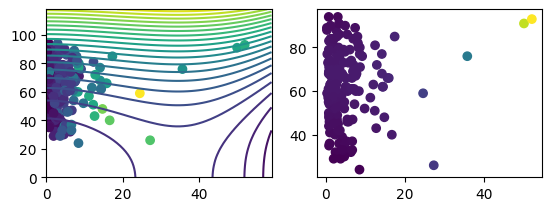

In [22]:
# compile the test data
test_input = test[:, :2]
test_answers = test[:, 2]

# make the actual prediction
score = model.test(test_input, test_answers)
pred = model.predict(weights[-1], test_input)

# and well...
print(score)

# plot it all
fig = plt.figure()
ax = fig.add_subplot(223)
ax.scatter(test_input[:, 0], test_input[:, 1], c=test_answers)
ax.contour(x, y, func(weights[-1], x, y), levels=20)
fig.add_subplot(224).scatter(test_input[:, 0], test_input[:, 1], c=pred)
plt.show()